In [1]:
import numpy as np
import os
import glob

In [2]:
import matplotlib
matplotlib.rcParams['font.size'] = 24
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    "font.family": "serif",
    'axes.linewidth': 2,
})

In [3]:
def compute_pbc_distance(center, neighbors, cell):
    '''
    center: 1*3; neighbors: N*3; cell: 3*3 array
    '''
    D = np.abs(np.dot(center - neighbors, np.linalg.inv(cell)))
    D -= D//0.5
    D = np.sqrt(np.sum(np.square(np.dot(D, cell)), axis=1))
    return D

def compute_distance_matrix(centers, neighbors, cell):
    '''
    centers: M*3; neighbors: N*3; cell: 3*3 array
    '''
    DM = np.zeros([centers.shape[0], neighbors.shape[0]])
    for i, center in enumerate(centers):
        DM[i] = compute_pbc_distance(center, neighbors, cell)
    return DM

def compute_pRDF(distance_matrix, r_cut, dr, bins, volume):
    D = np.ravel(distance_matrix)
    g_r = np.histogram(D[(D>0) & (D<r_cut)], bins=bins)[0] 
    vol_shell = 4*np.pi*dr*bins**2
    g_r = g_r / vol_shell[1:]
    g_r *= volume / (distance_matrix.shape[0] * distance_matrix.shape[1])
    return g_r

In [4]:
r_cut = 10
dr = 0.1
bins = np.linspace(0, r_cut, int(r_cut/dr)+1)

In [5]:
colors = ['green', 'blue', 'purple', 'orange']

Text(0, 0.5, '$g(r)$')

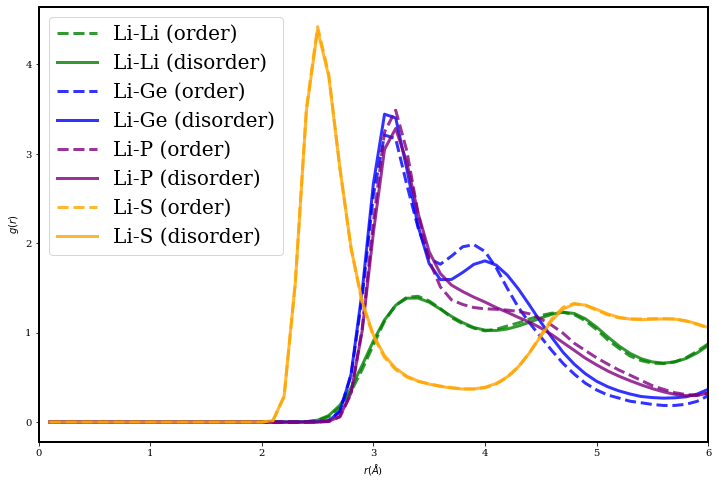

In [6]:
frame = 'Ge'
temp = 500

plt.figure(figsize=[12, 8])
for j, neighbor in enumerate(['Li', frame, 'P', 'S']):
    order = glob.glob(f'Li{frame}PS/time/{temp}/*/pRDF-Li-{neighbor}.npy')
    disorder = glob.glob(f'Li{frame}PS/disorder/{temp}/*/pRDF-Li-{neighbor}.npy')

    order_data = np.vstack([np.load(f) for f in order])
    disorder_data = np.vstack([np.load(f) for f in disorder])    
    for i, data in enumerate([order_data, disorder_data]):
        m = data.mean(axis=0)
        s = data.std(axis=0)
        plt.plot(bins[1:], m, linewidth=3, linestyle=['dashed', 'solid'][i], color=colors[j], 
                 alpha=0.8, label=f"Li-{neighbor} ({['order', 'disorder'][i]})")
plt.legend(fontsize=20, loc=2)
plt.xlim(0, 6)
plt.xlabel('$r (\AA$)')
plt.ylabel('$g(r)$')

Text(0, 0.5, '$g(r)$')

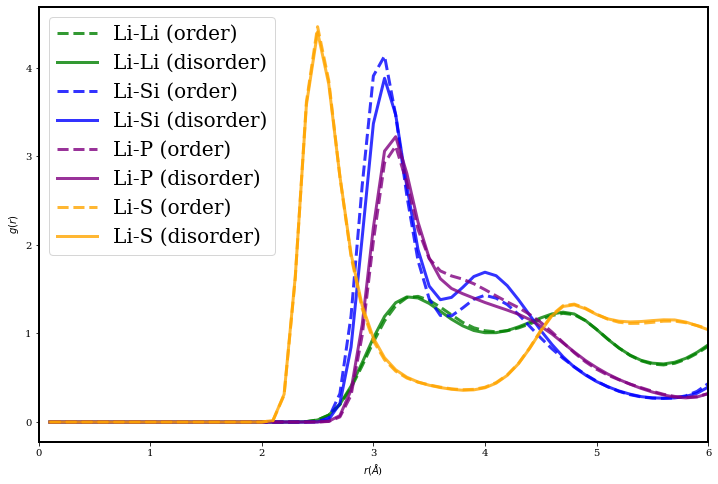

In [7]:
frame = 'Si'
temp = 500

plt.figure(figsize=[12, 8])
for j, neighbor in enumerate(['Li', frame, 'P', 'S']):
    order = glob.glob(f'Li{frame}PS/time/{temp}/*/pRDF-Li-{neighbor}.npy')
    disorder = glob.glob(f'Li{frame}PS/disorder/{temp}/*/pRDF-Li-{neighbor}.npy')

    order_data = np.vstack([np.load(f) for f in order])
    disorder_data = np.vstack([np.load(f) for f in disorder])    
    for i, data in enumerate([order_data, disorder_data]):
        m = data.mean(axis=0)
        s = data.std(axis=0)
        plt.plot(bins[1:], m, linewidth=3, linestyle=['dashed', 'solid'][i], color=colors[j], 
                 alpha=0.8,  label=f"Li-{neighbor} ({['order', 'disorder'][i]})")
plt.legend(fontsize=20, loc=2)
plt.xlim(0, 6)
plt.xlabel('$r (\AA$)')
plt.ylabel('$g(r)$')

In [8]:
frame = 'Sn'
temp = 500

plt.figure(figsize=[12, 8])
for j, neighbor in enumerate(['Li', frame, 'P', 'S']):
    order = glob.glob(f'Li{frame}PS/time/{temp}/*/pRDF-Li-{neighbor}.npy')
    disorder = glob.glob(f'Li{frame}PS/disorder/{temp}/*/pRDF-Li-{neighbor}.npy')

    order_data = np.vstack([np.load(f) for f in order])
    disorder_data = np.vstack([np.load(f) for f in disorder])    
    for i, data in enumerate([order_data, disorder_data]):
        m = data.mean(axis=0)
        s = data.std(axis=0)
        plt.plot(bins[1:], m, linewidth=3, linestyle=['dashed', 'solid'][i], color=colors[j], 
                 alpha=0.8,  label=f"Li-{neighbor} ({['order', 'disorder'][i]})")
plt.legend(fontsize=20, loc=2)
plt.xlim(0, 6)
plt.xlabel('$r (\AA$)')
plt.ylabel('$g(r)$')

ValueError: need at least one array to concatenate

<Figure size 864x576 with 0 Axes>